In [279]:
import numpy as np 
import pandas as pd
import plotly.express as px
import math
import scipy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.4f}'.format

In [280]:
Students_data = pd.read_excel('studentdemo.xlsx')
paired_data = pd.read_csv('pairdtestdata.csv')
real_estate = pd.read_csv('real_estate_clean.csv')

In [281]:
Students_data.head()

,sex,age,address,internet,romantic,Dalc,absences,G1,G2,G3
0,F,18,U,no,no,1,6,5,6,6
1,F,17,U,yes,no,1,4,5,5,6
2,F,15,U,yes,no,2,10,7,8,10
3,F,15,U,yes,yes,1,2,15,14,15
4,F,16,U,no,no,1,4,6,10,10


In [282]:
Students_data.describe()

,age,Dalc,absences,G1,G2,G3
count,395.0000,395.0000,395.0000,395.0000,395.0000,395.0000
mean,16.6962,1.4810,5.7089,10.9089,10.7139,10.4152
std,1.2760,0.8907,8.0031,3.3192,3.7615,4.5814
min,15.0000,1.0000,0.0000,3.0000,0.0000,0.0000
25%,16.0000,1.0000,0.0000,8.0000,9.0000,8.0000
50%,17.0000,1.0000,4.0000,11.0000,11.0000,11.0000
75%,18.0000,2.0000,8.0000,13.0000,13.0000,14.0000
max,22.0000,5.0000,75.0000,19.0000,19.0000,20.0000


In [283]:
paired_data.head()

,Weight Before,Weight After
0,250,271
1,255,283
2,272,291
3,232,258
4,254,273


In [284]:
real_estate.head()

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
0,For rent,Purvciems,Dzelzavas 93,1,27.0000,3.0000,5.0000,LT proj.,Brick-Panel,All amenities,250.0000,56.9555,24.2021
1,For rent,Ziepniekkalns,Ozolciema 32,2,50.0000,7.0000,9.0000,602.,Panel,All amenities,300.0000,56.8998,24.0984
2,For sale,centrs,Ieroču 6,2,33.0000,1.0000,2.0000,P. kara,Wood,Partial amenities,13500.0000,56.9751,24.1399
3,For sale,Ķengarags,Maskavas 305,2,50.0000,5.0000,5.0000,LT proj.,Panel,All amenities,34000.0000,56.8598,24.3083
4,For rent,Teika,Zemgala gatve 80,3,76.0000,3.0000,12.0000,Jaun.,Masonry,All amenities,490.0000,56.9777,24.1660


In [285]:
real_estate.describe()

,area,floor,total_floors,price,lat,lon
count,3944.0000,3944.0000,3944.0000,3944.0000,3944.0000,3944.0000
mean,61.7221,3.5989,6.0261,58764.5953,56.9008,23.5571
std,35.5276,2.4975,3.5392,76532.4961,0.6829,8.2035
min,5.0000,1.0000,1.0000,5.0000,46.7704,-100.7082
25%,40.0000,2.0000,5.0000,450.0000,56.9431,24.0955
50%,53.0000,3.0000,5.0000,40000.0000,56.9548,24.1271
75%,75.0000,5.0000,7.0000,82125.0000,56.9651,24.1734
max,427.0000,24.0000,30.0000,830000.0000,59.3475,24.3409


In [286]:
real_estate.op_type.value_counts()

For sale    2503
For rent    1435
Other          4
Change         2
Name: op_type, dtype: int64

In [287]:
real_estate.op_type.replace('Other', 'For rent', inplace=True)
real_estate.op_type.replace('Change', 'For rent', inplace=True)
real_estate.op_type.value_counts()

For sale    2503
For rent    1441
Name: op_type, dtype: int64

In [288]:
fig = px.histogram(data_frame = real_estate, x='price', color='op_type', marginal='box', title='Histogram of House Prices')
fig.show()

In [289]:
from scipy.stats import ttest_1samp
## library for one sample t-test

# INFERENTIAL STATISTICS
# HYPOTHESIS TESTING USING 
#### Pvalue 
#### Critical value 
#### Confidence interval

## one sample t-test using pvalue
To test whether the sample mean and the hypothesized mean are equal or different 
Null hypothesis - no relationship or no difference thus have the same mean 
Alternative hypothesis - relationship between variables thus different means
If pvalue is less than 0.05 then we reject the null hypothesis otherwise we fail to reject 
if the sample mean is not significantly different tothe hypothesized then we reject the null hypothesis 

In [290]:
tscore, pvalue = ttest_1samp(Students_data.age, popmean=17)
print("t Statistic:  {:.4f}".format(tscore))
print("P Value:  {:.4f}".format(pvalue))

if pvalue<0.05:
    print('The pvalue is less than alpha = 0.05, reject the null hypothesis')
else:
        print('Since pvalue is greater than 0.05, there isno sufficient evidence to reject the null hypothesis')


t Statistic:  -4.7317
P Value:  0.0000
The pvalue is less than alpha = 0.05, reject the null hypothesis


In [291]:
## library for independent t-test
from scipy.stats import ttest_ind

In [292]:
Students_data.groupby('sex').mean()

,age,Dalc,absences,G1,G2,G3
sex,,,,,,
F,16.7308,1.2548,6.2163,10.6202,10.3894,9.9663
M,16.6578,1.7326,5.1444,11.2299,11.0749,10.9144


## Two sample t-test(independent) using pvalue
even if male students had higher mean average in G1 compared to their female counterparts, the difference is not statistically significant 

In [293]:
G1_male = Students_data.G1[Students_data.sex=='M']
G1_female = Students_data.G1[Students_data.sex=='F']

tscore, pvalue = ttest_ind(G1_male, G1_female, equal_var = False)
print("t Statistic: {:.4f}".format(tscore))
print("p value: {:.4f}".format(pvalue))

if pvalue<0.05:
    print('The pvalue is less than alpha = 0.05, reject the null hypothesis')
else:
        print('Since pvalue is greater than 0.05, there isno sufficient evidence to reject the null hypothesis')



t Statistic: 1.8237
p value: 0.0690
Since pvalue is greater than 0.05, there isno sufficient evidence to reject the null hypothesis


## paired sample t-test using pvalue
mean difference in the weight of chicks before and two weeks after they are subject to new feed is statistically significant. Therefore we have enough evidence to reject the null hypothesis 

In [294]:
## library for paired sample t-test
from scipy.stats import ttest_rel 

In [295]:
tscore, pvalue = ttest_rel(paired_data['Weight Before'], paired_data['Weight After'])
print("t Statistic: {:.4f}".format(tscore))
print("P Value: {:.4f}".format(pvalue))

if pvalue<0.05:
    print('The pvalue is less than alpha = 0.05, reject the null hypothesis')
else:
        print('Since pvalue is greater than 0.05, there isno sufficient evidence to reject the null hypothesis')


t Statistic: -18.8433
P Value: 0.0000
The pvalue is less than alpha = 0.05, reject the null hypothesis


# Decision based on critical value to test hypothesis
We look at the value of the test statistics. If the absolute value of the test statistics (tscore) is greater than the t_critical value, we reject the null hypothesis 
We will use 0.975 to find the critical value 

In [296]:
from scipy.stats import t ###library to get the critical value 
import math

## One sample t-test using critical value

In [297]:
tscore, pvalue = ttest_1samp(Students_data.age, popmean=17)
print("t Statistic: {:.4f}".format(tscore))
print("P Value: {:.4f}".format(pvalue))

t_critical_value = t.ppf(q=0.975, df=len(Students_data.age)-1)
print("T critical value: {:.4f}".format(t_critical_value))
print()
if np.abs(tscore)>t_critical_value:
    print('The absolute of T_Statistics is greater than T_critical value, reject the null hypothesis')
else:
        print('Since absolute of T_Statistics is less than T_critical value, there is no sufficient evidence to reject the null hypothesis')


t Statistic: -4.7317
P Value: 0.0000
T critical value: 1.9660

The absolute of T_Statistics is greater than T_critical value, reject the null hypothesis


## Independent two sample t-test
   ### Mean difference in G1

In [298]:
G1_male = Students_data.G1[Students_data.sex=='M']
G1_female = Students_data.G1[Students_data.sex=='F']

tscore, pvalue = ttest_ind(G1_male, G1_female, equal_var = False)
print("t Statistic: {:.4f}".format(tscore))
print("p value: {:.4f}".format(pvalue))

t_critical_value = t.ppf(q=0.975, df=len(G1_male)+len(G1_female)-2)
print("T critical value: {:.4f}".format(t_critical_value))
print()
if np.abs(tscore)>t_critical_value:
    print('The absolute of T_Statistics is greater than T_critical value, reject the null hypothesis')
else:
        print('Since absolute of T_Statistics is less than T_critical value, there is no sufficient evidence to reject the null hypothesis')


t Statistic: 1.8237
p value: 0.0690
T critical value: 1.9660

Since absolute of T_Statistics is less than T_critical value, there is no sufficient evidence to reject the null hypothesis


###  Mean difference in G2

In [299]:
G2_male = Students_data.G2[Students_data.sex=='M']
G2_female = Students_data.G2[Students_data.sex=='F']

tscore, pvalue = ttest_ind(G2_male, G2_female, equal_var = False)
print("t Statistic: {:.4f}".format(tscore))
print("p value: {:.4f}".format(pvalue))

t_critical_value = t.ppf(q=0.975, df=len(G2_male)+len(G2_female)-2)
print("T critical value: {:.4f}".format(t_critical_value))
print()
if np.abs(tscore)>t_critical_value:
    print('The absolute of T_Statistics is greater than T_critical value, reject the null hypothesis')
else:
        print('Since absolute of T_Statistics is less than T_critical value, there is no sufficient evidence to reject the null hypothesis')


t Statistic: 1.8077
p value: 0.0714
T critical value: 1.9660

Since absolute of T_Statistics is less than T_critical value, there is no sufficient evidence to reject the null hypothesis


# Confidence interval method in hypothesis testing 
## one sample t-test using confidence interval
we will reject the null hyposthesis because the hypothesized mean 17 is not within the confidence interval

In [300]:
print("Hypothesized mean age = 17")

## calculate the critical value 
t_critical_value = t.ppf(q=0.975, df=394)
print("T critical value: {:.4f}".format(t_critical_value))

## Standard deviation
std_dv = Students_data.age.std(ddof=1)
print("The standard deviation: {:.4f}".format(std_dv))

##Standard error
std_error = std_dv/math.sqrt(len(Students_data.age))
print("The stanard error: {:.4f}".format(std_error))

##Calculate Margin of error
error_margin =t_critical_value*std_error
print("The margin of Error: {:.4f}".format(error_margin))

##Confidence interval
confidence_interval = (Students_data.age.mean() - error_margin,
                      Students_data.age.mean() + error_margin)
print("The confidence interval is: ", confidence_interval)
print()
print("Reject the null hypothesis if the hypothesized mean does not fall within the confidence interval")

## we will reject the null hyposthesis because the hypothesized mean 17 is not within the confidence interval

Hypothesized mean age = 17
T critical value: 1.9660
The standard deviation: 1.2760
The stanard error: 0.0642
The margin of Error: 0.1262
The confidence interval is:  (16.569975930412973, 16.822429132878163)

Reject the null hypothesis if the hypothesized mean does not fall within the confidence interval


## Independent sample t-test (confidence interval)
we will fail to reject the null hypothesis as the difference in mean 0.610 is is less than differnce in confidence level 0.655,
and the pvalue is more than 0.05 

In [301]:
G1_male = Students_data.G1[Students_data.sex=='M']
G1_female = Students_data.G1[Students_data.sex=='F']

#sample size of male and  female
N_male = len(G1_male)
N_female = len(G1_female)
degree_of_freedom = N_male + N_female - 2

tscore, pvalue = ttest_ind(G1_male, G1_female)
print("t Statistic: {:.4f}".format(tscore))
print("p value: {:.4f}".format(pvalue))
t_critical_value = t.ppf(q=0.975, df = degree_of_freedom)

## calculate the mean difference and 95% confidence interval
std_male = G1_male.std(ddof=1)
std_female = G1_female.std(ddof=1)

pooled_std = math.sqrt( ((N_male-1)*(std_male)**2 + (N_female-1)*(std_female)**2)/ degree_of_freedom)
std_error = (pooled_std/math.sqrt(N_female + N_male))

diff_mean = G1_male.mean() - G1_female.mean()
MoE = t_critical_value * std_error

print("Sample sizes: \n\tsample size of male = {}\n\tsample size of female = {}".format(N_male, N_female))
print("Means in G1: \n\tMean of male in G1 = {:.3f}\n\tMean of female in G1 = {:.3f}".format(G1_male.mean(), G1_female.mean()))
print("Standard deviation in G1: \n\tStd of male in G1 = {:.3f}\n\tStd of female in G1 = {:.3f}".format(std_male, std_female))
print("Pooled std, Standard error and Margin of error: \n\tPooled Std Deviation = {:.3f}\n\tStandard Error = {:.3f}\n\tMargin of Error = {:.3f}".format(pooled_std, std_error, MoE))
print("The results of the independent t-test are: \n\tt-value = {:.3f}\n\tp_value = {:.3f}\n\tt-critical value = {:.3f}".format(tscore, pvalue, t_critical_value))
print("\nThe difference between groups is {:.3f} [{:.3f} to {:.3f}] (mean [95% CI])".format(diff_mean, diff_mean - MoE, diff_mean + MoE))

## we will fail to reject the null hypothesis as the difference in mean 0.610 is less than differnce in confidence level 
## and the pvalue is more than 0.05 

t Statistic: 1.8284
p value: 0.0683
Sample sizes: 
	sample size of male = 187
	sample size of female = 208
Means in G1: 
	Mean of male in G1 = 11.230
	Mean of female in G1 = 10.620
Standard deviation in G1: 
	Std of male in G1 = 3.393
	Std of female in G1 = 3.233
Pooled std, Standard error and Margin of error: 
	Pooled Std Deviation = 3.309
	Standard Error = 0.167
	Margin of Error = 0.327
The results of the independent t-test are: 
	t-value = 1.828
	p_value = 0.068
	t-critical value = 1.966

The difference between groups is 0.610 [0.282 to 0.937] (mean [95% CI])


In [302]:
## we fail to reject the null hypothesis as the difference in confidence interval is more than the difference between groups
0.937 - 0.282
## NB if the differnce between groups 0.610 is greater than the difference in confidence interval 
## then we reject the null hypothesis

0.655

# Using the pingouin library to test hypothesis

In [303]:
## library for pingouin 
import pingouin as pg

## One sample t-test using pingouin

In [304]:
result = pg.ttest(Students_data.age, 17, correction = False)
display(result)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.7317,394,two-sided,0.0000,"[16.57, 16.82]",0.2381,2798.407,0.9971


In [305]:
## Mean of the students age 
Students_data.age.mean()

16.696202531645568

### One sided t-test(less)
##### Null hypothesis: Mean_age >= 17
##### Alternative hypothesis : Mean_age < 17

In [306]:
## Reject the null hypothesis
result = pg.ttest(Students_data.age, 17, correction = False, alternative='less')
display(result)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.7317,394,less,0.0000,"[-inf, 16.8]",0.2381,5596.814,0.9990


### One sided t-test(greater)
##### Null hypothesis:  Mean_age <= 17
##### Alternative hypothesis : Mean_age > 17

In [307]:
## Fail to reject the null hypothesis
result = pg.ttest(Students_data.age, 17, correction = False, alternative='greater')
display(result)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.7317,394,greater,1.0000,"[16.59, inf]",0.2381,0.0,0.0000


## Two sample t-test using pingouin

In [308]:
G1_male = Students_data.G1[Students_data.sex == 'M']
G1_female = Students_data.G1[Students_data.sex == 'F']

print('Mean difference: {:.4f}'.format(G1_male.mean()-G1_female.mean()))
result = pg.ttest(G1_male, G1_female, correction='auto')
display(result)

Mean difference: 0.6098


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.8237,383.7884,two-sided,0.0690,"[-0.05, 1.27]",0.1843,0.552,0.4460


### One sided t-test(less)
##### Null hypothesis: Mean  G1_m >=  Mean  G1_f
##### Alternative hypothesis : Mean  G1_m <  Mean  G1_f

In [309]:
G1_male = Students_data.G1[Students_data.sex == 'M']
G1_female = Students_data.G1[Students_data.sex == 'F']

print('Mean difference: {:.4f}'.format(G1_male.mean()-G1_female.mean()))
result = pg.ttest(G1_male, G1_female, correction='auto', alternative='less')
display(result)

Mean difference: 0.6098


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.8237,383.7884,less,0.9655,"[-inf, 1.16]",0.1843,0.905,0.0003


### One sided t-test(greater)
##### Null hypothesis: Mean  G1_m <=  Mean  G1_f
##### Alternative hypothesis : Mean  G1_m >  Mean  G1_f

In [310]:
G1_male = Students_data.G1[Students_data.sex == 'M']
G1_female = Students_data.G1[Students_data.sex == 'F']

print('Mean difference: {:.4f}'.format(G1_male.mean()-G1_female.mean()))
result = pg.ttest(G1_male, G1_female, correction='auto', alternative='greater')
display(result)

Mean difference: 0.6098


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.8237,383.7884,greater,0.0345,"[0.06, inf]",0.1843,1.105,0.5716


## Paired Sample T-test using pingouin

In [311]:
result = pg.ttest(paired_data['Weight Before'], paired_data['Weight After'], paired=True)
display(result)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-18.8433,9,two-sided,0.0000,"[-26.88, -21.12]",1.9453,6.069e+05,0.9997


# Analysis of variance using statsmodels package

## One-way Anova
Compares the means of two or more independent groups and one dependent group

In [312]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### comparing mean by op_type

In [313]:
model = ols('price ~ op_type', data = real_estate).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
op_type,7703230985732.0566,1.0000,1972.8777,0.0000
Residual,15391799150564.0820,3942.0000,NaN,NaN


## Pairwise comparison for one-way Anova
It provides further analysis needed to reveal which specific groups have significant mean difference between them. It is based on the independent t-test analysis

In [314]:
pair_t = model.t_test_pairwise('op_type')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
For sale-For rent,91778.8260,2066.2955,44.4171,0.0000,87727.7175,95829.9346,0.0000,True


### comparing mean by house type

In [315]:
model = ols('price ~ house_type', data = real_estate).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
house_type,1439904957363.7930,5.0000,52.3695,0.0000
Residual,21655125178932.3555,3938.0000,NaN,NaN


In [316]:
real_estate.house_type.value_counts()

Masonry        1236
Panel          1114
Brick           808
Brick-Panel     404
Panel-Brick     200
Wood            182
Name: house_type, dtype: int64

In [317]:
print('number of data points', real_estate.shape[0])

number of data points 3944


In [318]:
## df 
3944 - 6

3938

## Pairwise comparison for one-way anova

In [319]:
pair_t = model.t_test_pairwise('house_type')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Brick-Panel-Brick,13803.3144,4518.5328,3.0548,0.0023,4944.4300,22662.1987,0.0135,True
Masonry-Brick,42996.0155,3354.8107,12.8162,0.0000,36418.6857,49573.3452,0.0000,True
Panel-Brick,5790.2721,3426.6592,1.6898,0.0912,-927.9213,12508.4655,0.1218,False
Panel-Brick-Brick,31177.1879,5856.6879,5.3233,0.0000,19694.7614,42659.6144,0.0000,True
Wood-Brick,-15093.6662,6084.4134,-2.4807,0.0132,-27022.5638,-3164.7687,0.0516,False
Masonry-Brick-Panel,29192.7011,4249.7609,6.8693,0.0000,20860.7619,37524.6403,0.0000,True
Panel-Brick-Panel,-8013.0422,4306.7048,-1.8606,0.0629,-16456.6236,430.5392,0.1218,False
Panel-Brick-Brick-Panel,17373.8735,6411.4356,2.7098,0.0068,4803.8273,29943.9198,0.0334,True
Wood-Brick-Panel,-28896.9806,6620.1057,-4.3650,0.0000,-41876.1386,-15917.8226,0.0001,True
Panel-Masonry,-37205.7433,3063.5473,-12.1447,0.0000,-43212.0318,-31199.4549,0.0000,True


## Two-way Anova

In [320]:
model = ols('price ~ op_type+house_type + op_type:house_type', data = real_estate).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
op_type,8048375046752.6787,1.0000,2499.5496,0.0000
house_type,1785049018384.4424,5.0000,110.8750,0.0000
op_type:house_type,945985126880.8801,5.0000,58.7581,0.0000
Residual,12660765005298.7695,3932.0000,NaN,NaN


In [321]:
##no need
pair_t = model.t_test_pairwise('op_type')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
For sale-For rent,71764.3761,4031.4415,17.8012,0.0000,63860.4629,79668.2892,0.0000,True


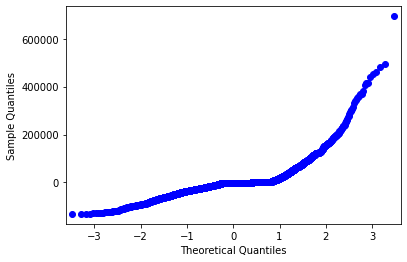

In [322]:
result = model.resid
fig = sm.qqplot(result)
plt.show()

# Analysis of variance using pingouin package

## One-way ANOVA

In [323]:
aov = pg.anova(data=real_estate, dv='price', between='op_type', detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,op_type,7703230985732.0703,1,7703230985732.0703,1972.8777,0.0000,0.3335
1,Within,15391799150564.0840,3942,3904565994.5622,NaN,NaN,NaN


### Pairwise for one-way anova

In [324]:
pt = pg.pairwise_tukey(data=real_estate, dv='price', between='op_type')
pt

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,For rent,For sale,518.5503,92297.3763,-91778.8260,2066.2955,-44.4171,0.0010,-1.4685


## Two-way ANOVA 

In [325]:
aov = pg.anova(data=real_estate, dv='price', between=['op_type', 'house_type'], detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,op_type,8048375046752.7002,1.0000,8048375046752.7002,2499.5496,0.0000,0.3886
1,house_type,1785049018384.4329,5.0000,357009803676.8866,110.8750,0.0000,0.1236
2,op_type * house_type,945985126880.8793,5.0000,189197025376.1758,58.7581,0.0000,0.0695
3,Residual,12660765005298.7676,3932.0000,3219930062.3852,NaN,NaN,NaN


### Pairwise for two-way anova

In [326]:
pt = pg.pairwise_tukey(data=real_estate, dv='price', between='house_type')
pt

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Brick,Brick-Panel,41356.2871,55159.6015,-13803.3144,4518.5328,-3.0548,0.0275,-0.1860
1,Brick,Masonry,41356.2871,84352.3026,-42996.0155,3354.8107,-12.8162,0.0010,-0.5796
2,Brick,Panel,41356.2871,47146.5592,-5790.2721,3426.6592,-1.6898,0.5331,-0.0781
3,Brick,Panel-Brick,41356.2871,72533.4750,-31177.1879,5856.6879,-5.3233,0.0010,-0.4201
4,Brick,Wood,41356.2871,26262.6209,15093.6662,6084.4134,2.4807,0.1297,0.2034
5,Brick-Panel,Masonry,55159.6015,84352.3026,-29192.7011,4249.7609,-6.8693,0.0010,-0.3935
6,Brick-Panel,Panel,55159.6015,47146.5592,8013.0422,4306.7048,1.8606,0.4289,0.1080
7,Brick-Panel,Panel-Brick,55159.6015,72533.4750,-17373.8735,6411.4356,-2.7098,0.0737,-0.2340
8,Brick-Panel,Wood,55159.6015,26262.6209,28896.9806,6620.1057,4.3650,0.0010,0.3892
9,Masonry,Panel,84352.3026,47146.5592,37205.7433,3063.5473,12.1447,0.0010,0.5016


In [327]:
px.box(data_frame = real_estate, x='house_type', y='price', title='Boxplot of housetype and price')

# Hypothesis testing for testing normality
to check for normality of 

# CORELATION Between G1,G2 and G3 
## using Pearson r

In [267]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import kendalltau

In [268]:
cor, p_value = pearsonr(Students_data.G1, Students_data.G2)
print("correlation coefficient for G1 and G2: {:.4f}".format(cor))
print("P Value for G1 and G2: {:.4f}".format(p_value))
if p_value<0.05:
    print('The p_value is less than alpha = 0.05, correlation is statistically significant')
else:
        print('Correlation not statistically significant')
        
print('*************G1 and G2***********')
        
cor, p_value = pearsonr(Students_data.G1, Students_data.G3)
print("correlation coefficient for G1 and G3: {:.4f}".format(cor))
print("P Value for G1 and G3: {:.4f}".format(p_value))
if p_value<0.05:
    print('The p_value is less than alpha = 0.05, correlation is statistically significant')
else:
        print('Correlation not statistically significant')
        
print('*************G2 and G3***********')
        
cor, p_value = pearsonr(Students_data.G2, Students_data.G3)
print("correlation coefficient for G2 and G3: {:.4f}".format(cor))
print("P Value for G2 and G3: {:.4f}".format(p_value))

        

        



correlation coefficient for G1 and G2: 0.8521
P Value for G1 and G2: 0.0000
The p_value is less than alpha = 0.05, correlation is statistically significant
*************G1 and G2***********
correlation coefficient for G1 and G3: 0.8015
P Value for G1 and G3: 0.0000
The p_value is less than alpha = 0.05, correlation is statistically significant
*************G2 and G3***********
correlation coefficient for G2 and G3: 0.9049
P Value for G2 and G3: 0.0000


## Using spearmanr

In [269]:
cor, p_value = spearmanr(Students_data.G1, Students_data.G2)
print("correlation coefficient for G1 and G2: {:.4f}".format(cor))
print("P Value for G1 and G2: {:.4f}".format(p_value))
if p_value<0.05:
    print('The p_value is less than alpha = 0.05, correlation is statistically significant')
else:
        print('Correlation not statistically significant')
        
print('*************G1 and G2***********')
        
cor, p_value = spearmanr(Students_data.G1, Students_data.G3)
print("correlation coefficient for G1 and G3: {:.4f}".format(cor))
print("P Value for G1 and G3: {:.4f}".format(p_value))
if p_value<0.05:
    print('The p_value is less than alpha = 0.05, correlation is statistically significant')
else:
        print('Correlation not statistically significant')
        
print('*************G2 and G3***********')
        
cor, p_value = spearmanr(Students_data.G2, Students_data.G3)
print("correlation coefficient for G2 and G3: {:.4f}".format(cor))
print("P Value for G2 and G3: {:.4f}".format(p_value))


correlation coefficient for G1 and G2: 0.8948
P Value for G1 and G2: 0.0000
The p_value is less than alpha = 0.05, correlation is statistically significant
*************G1 and G2***********
correlation coefficient for G1 and G3: 0.8780
P Value for G1 and G3: 0.0000
The p_value is less than alpha = 0.05, correlation is statistically significant
*************G2 and G3***********
correlation coefficient for G2 and G3: 0.9571
P Value for G2 and G3: 0.0000


## Using Kendall Tau

In [270]:
cor, p_value = kendalltau(Students_data.G1, Students_data.G2)
print("correlation coefficient for G1 and G2: {:.4f}".format(cor))
print("P Value for G1 and G2: {:.4f}".format(p_value))
if p_value<0.05:
    print('The p_value is less than alpha = 0.05, correlation is statistically significant')
else:
        print('Correlation not statistically significant')
        
print('*************G1 and G2***********')
        
cor, p_value = kendalltau(Students_data.G1, Students_data.G3)
print("correlation coefficient for G1 and G3: {:.4f}".format(cor))
print("P Value for G1 and G3: {:.4f}".format(p_value))
if p_value<0.05:
    print('The p_value is less than alpha = 0.05, correlation is statistically significant')
else:
        print('Correlation not statistically significant')
        
print('*************G2 and G3***********')
        
cor, p_value = kendalltau(Students_data.G2, Students_data.G3)
print("correlation coefficient for G2 and G3: {:.4f}".format(cor))
print("P Value for G2 and G3: {:.4f}".format(p_value))


correlation coefficient for G1 and G2: 0.7735
P Value for G1 and G2: 0.0000
The p_value is less than alpha = 0.05, correlation is statistically significant
*************G1 and G2***********
correlation coefficient for G1 and G3: 0.7463
P Value for G1 and G3: 0.0000
The p_value is less than alpha = 0.05, correlation is statistically significant
*************G2 and G3***********
correlation coefficient for G2 and G3: 0.8835
P Value for G2 and G3: 0.0000


# Regression using stats model

In [271]:
import statsmodels.api as sm

In [272]:
mod = sm.OLS(Students_data.G3, Students_data.G1)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              6212.
Date:                Fri, 03 Sep 2021   Prob (F-statistic):                   2.54e-243
Time:                        16:29:39   Log-Likelihood:                         -964.10
No. Observations:                 395   AIC:                                      1930.
Df Residuals:                     394   BIC:                                      1934.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Multiple Linear Regression

In [273]:
predictors = Students_data[['G1','G2']]
response = Students_data.G3

mult_mod = sm.OLS(response, predictors)
mult_res = mult_mod.fit()
print(mult_res.summary())

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              6151.
Date:                Fri, 03 Sep 2021   Prob (F-statistic):                   2.71e-297
Time:                        16:29:40   Log-Likelihood:                         -834.58
No. Observations:                 395   AIC:                                      1673.
Df Residuals:                     393   BIC:                                      1681.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------